*Creado por:*

*Isabel Maniega*

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pip install pandas

In [3]:
# pip install scikit-learn

In [4]:
# pip install seaborn

In [5]:
import pandas as pd
from sklearn.datasets import fetch_openml
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Cargar el titanic con sklearn

In [6]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
# df.to_csv("Titanic_all.csv")

# Mostrar las columnas sin datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   float64 
 5   parch      1309 non-null   float64 
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
dtypes: category(2), float64(6), object(5)
memory usage: 115.4+ KB


In [9]:
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<Axes: title={'center': 'Missing values in percentage'}, ylabel='percentage'>

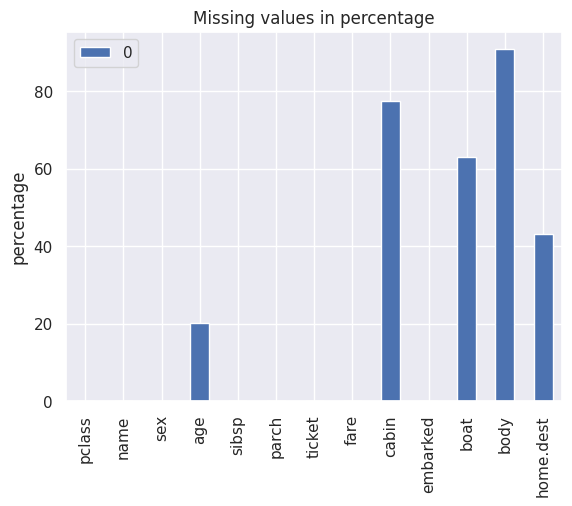

In [10]:
# Visusalización de los datos

sns.set()
miss_vals = pd.DataFrame(df.isnull().sum()/ len(df)*100)
miss_vals.plot(kind="bar", 
               title="Missing values in percentage", 
               ylabel="percentage")

## Procedimiento para valores nulos

Existen dos maneras:

* Eliminar la columna
* Asignamos a los valores la media, mediana, moda, etc

**Eliminación**

* Eliminamos los valores nulos:

In [11]:
print(f"Size of the dataset: {df.shape}")
df.drop(["cabin", "boat", "body", "home.dest"], axis=1)
df.dropna(inplace=True)
print(f"Size of the dataset: {df.shape}")

Size of the dataset: (1309, 13)
Size of the dataset: (0, 13)


**Sustitución**

* Sustituir por el valor más común (media):

In [12]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [13]:
print(f"Número de valores nulos de la columna edad: {df.age.isnull().sum()}")

Número de valores nulos de la columna edad: 263


In [14]:
df["age"].fillna(df["age"].mean())
print(f"Número de valores nulos de la columna edad: {df.age.isnull().sum()}")

Número de valores nulos de la columna edad: 263


* Otra opción: Simple transformación con Sklearn

In [15]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
print(f"Número de valores nulos de la columna edad: {df.age.isnull().sum()}")

Número de valores nulos de la columna edad: 263


In [17]:
imp = SimpleImputer(strategy="mean")
df["age"] = imp.fit_transform(df[["age"]])
print(f"Número de valores nulos de la columna edad: {df.age.isnull().sum()}")

Número de valores nulos de la columna edad: 0


In [18]:
print("Tipos de datos con valores Nulos:")
for col in df.columns[df.isnull().any()]:
    print(col, df[col][df[col].isnull()].values[0])

Tipos de datos con valores Nulos:
fare nan
cabin None
embarked nan
boat None
body nan
home.dest None


* Modificamos los None:

In [19]:
imp = SimpleImputer(missing_values=None, strategy="most_frequent")
df["cabin"] = imp.fit_transform(df[["cabin"]])
print(f"Número de valores nulos de la columna cabina: {df.cabin.isnull().sum()}")

ValueError: 2

In [20]:
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
        if df[col].dtype == "float64" or df[col].dtype == "int64" or df[col].dtype == "int32":
            strategy = "mean"
        else:
            strategy = "most_frequent"
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {"missing_values": missing_values, "strategy": strategy}
    return parameters
get_parameters(df)

{'fare': {'missing_values': nan, 'strategy': 'mean'},
 'cabin': {'missing_values': None, 'strategy': 'most_frequent'},
 'embarked': {'missing_values': nan, 'strategy': 'most_frequent'},
 'boat': {'missing_values': None, 'strategy': 'most_frequent'},
 'body': {'missing_values': nan, 'strategy': 'mean'},
 'home.dest': {'missing_values': None, 'strategy': 'most_frequent'}}

In [21]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [22]:
parameters = get_parameters(df)

for col, param in parameters.items():
    missing_values = param["missing_values"]
    strategy = param["strategy"]
    imp = SimpleImputer(missing_values=missing_values, strategy=strategy)
    df[col] = imp.fit_transform(df[[col]])

df.isnull().sum()

ValueError: 2

In [23]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


## Crear nuevas características (Feature Engineering)

* Sibsp: pasajeros que viajan con hermanos
* Parch: viajeros que viajan con niños

Calculamos el número de pasajeros que viajan solos:

In [24]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


<Axes: title={'center': 'Passenger travelled alone?'}, xlabel='travelled_alone'>

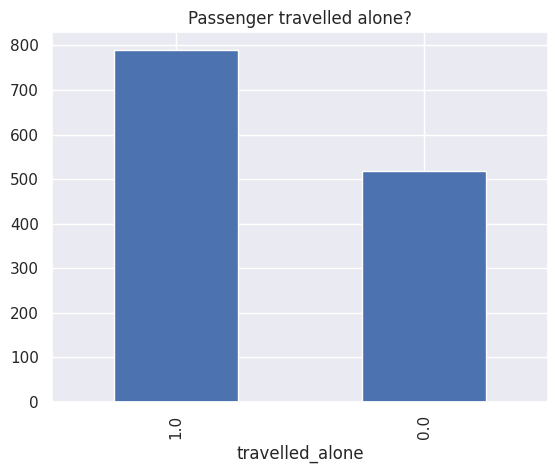

In [25]:
df["family"] = df["sibsp"] + df["parch"]

df.loc[df["family"] > 0, "travelled_alone"] = 0
df.loc[df["family"] == 0, "travelled_alone"] = 1

df["travelled_alone"].value_counts().plot(title="Passenger travelled alone?", kind="bar")

## Encode categorical features

* scikit-learn: OneHotEncoder()
* pandas: get_dummies()

In [26]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [27]:
df[["female", "male"]] = OneHotEncoder().fit_transform(df[['sex']]).toarray()
df[["sex", "female", "male"]]

,sex,female,male
0,female,1.0,0.0
1,male,0.0,1.0
2,female,1.0,0.0
3,male,0.0,1.0
4,female,1.0,0.0
...,...,...,...
1304,female,1.0,0.0
1305,female,1.0,0.0
1306,male,0.0,1.0
1307,male,0.0,1.0


Eliminaremos uno de las columnas para evitar la colinealidad

In [28]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]
df["sex"] = OneHotEncoder().fit_transform(df[['sex']]).toarray()[:, 1]
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


0 == female; 1== male

* Pandas:

In [29]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]

df["sex"] = pd.get_dummies(df["sex"], drop_first=True, dtype=float)
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


0 == female; 1== male

## Encoding all categorical features

In [30]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]

cat_cols = df.select_dtypes(include=["category"]).columns
print(f"Columnas Categoricas: {cat_cols}")

Columnas Categoricas: Index(['sex', 'embarked'], dtype='object')


In [31]:
for col in cat_cols:
    fill_value = df[col].mode()[0]
    df[col].fillna(fill_value)
    
    append_to = list(df[col].unique())
    
    print(append_to)
    
    df[append_to] = OneHotEncoder().fit_transform(df[[col]]).toarray()
    
    df.drop(col, axis=1)
    df.drop(append_to[0], axis=1)

print(df.columns)
df[["male", "C", "Q"]].head()

['female', 'male']
['S', 'C', nan, 'Q']
Index([   'pclass',      'name',       'sex',       'age',     'sibsp',
           'parch',    'ticket',      'fare',     'cabin',  'embarked',
            'boat',      'body', 'home.dest',    'female',      'male',
               'S',         'C',         nan,         'Q'],
      dtype='object')


,male,C,Q
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0


In [32]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,female,male,S,C,NaN,Q
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",1.0,0.0,0.0,0.0,1.0,0.0


## MinMaxScaler

MinMaxScaler() pone todos los valores númericos de 0 a 1:

In [33]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]

num_cols = df.select_dtypes(include=["int64", "int32", "float64"]).columns
print(num_cols)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')


In [34]:
for col in num_cols:
    fill_value = df[col].mean()
    df[col].fillna(fill_value)

minmax = MinMaxScaler()

df[num_cols] = minmax.fit_transform(df[num_cols])
df[num_cols]

,pclass,age,sibsp,parch,fare,body
0,0.0,0.361169,0.000,0.000000,0.412503,NaN
1,0.0,0.009395,0.125,0.222222,0.295806,NaN
2,0.0,0.022964,0.125,0.222222,0.295806,NaN
3,0.0,0.373695,0.125,0.222222,0.295806,0.409786
4,0.0,0.311064,0.125,0.222222,0.295806,NaN
...,...,...,...,...,...,...
1304,1.0,0.179540,0.125,0.000000,0.028213,1.000000
1305,1.0,NaN,0.125,0.000000,0.028213,NaN
1306,1.0,0.329854,0.000,0.000000,0.014102,0.926606
1307,1.0,0.336117,0.000,0.000000,0.014102,NaN


## StandardScaler

StandardScaler() poner todos los valores tengan una media de 0 y de desviación de 1

In [35]:
df = fetch_openml("titanic", version=1, as_frame=True)["data"]

num_cols = df.select_dtypes(include=["int64", "int32", "float64"]).columns
print(num_cols)

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')


In [36]:
for col in num_cols:
    fill_value = df[col].mean()
    df[col].fillna(fill_value)

ss = StandardScaler()

df[num_cols] = ss.fit_transform(df[num_cols])
df[num_cols].head()

,pclass,age,sibsp,parch,fare,body
0,-1.546098,-0.061162,-0.479087,-0.445000,3.441165,NaN
1,-1.546098,-2.010496,0.481288,1.866526,2.285603,NaN
2,-1.546098,-1.935302,0.481288,1.866526,2.285603,NaN
3,-1.546098,0.008251,0.481288,1.866526,2.285603,-0.265282
4,-1.546098,-0.338812,0.481288,1.866526,2.285603,NaN


In [37]:
df[num_cols].describe()

,pclass,age,sibsp,parch,fare,body
count,1.309000e+03,1.046000e+03,1.309000e+03,1.309000e+03,1.308000e+03,1.210000e+02
mean,-1.737003e-16,-1.358590e-16,-8.142201e-18,1.628440e-17,-8.691654e-17,-8.074349e-17
std,1.000382e+00,1.000478e+00,1.000382e+00,1.000382e+00,1.000382e+00,1.004158e+00
min,-1.546098e+00,-2.062556e+00,-4.790868e-01,-4.449995e-01,-6.435292e-01,-1.642574e+00
25%,-3.520907e-01,-6.164626e-01,-4.790868e-01,-4.449995e-01,-4.909206e-01,-9.128147e-01
50%,8.419164e-01,-1.305744e-01,-4.790868e-01,-4.449995e-01,-3.641609e-01,-5.971606e-02
75%,8.419164e-01,6.329641e-01,4.812878e-01,-4.449995e-01,-3.905147e-02,9.783920e-01
max,8.419164e-01,3.478880e+00,7.203909e+00,9.956864e+00,9.258680e+00,1.718429e+00


Usando el método de describe() podemos ver la media y la desvicación estandar de las columnas escaladas.

La media no parece ser igual a 0 pero, de hecho 4.342507e-17 es igual 0,000000000000000043425. Esto es tan cercano a 0 que puede considerarse igual a 0. Lo mismo ocurre con la desviación estándar que es tan cercana a 1 que puede considerarse igual a 1.

*Creado por:*

*Isabel Maniega*